In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import re

In [3]:
twt_btc = pd.read_csv("result.csv", error_bad_lines=False,engine = 'python')

,created_at,username,tweet
0,05-07-2021,davidgokhshtein,Whales are buying #Bitcoin because they unders...
1,05-07-2021,unicunshop,Gold and Silver Bitcoin Coins https://t.co/In...
2,05-07-2021,newsinvesting,Axie Infinity (AXS) and Waves make gains as Bi...
3,05-07-2021,elpoliticonews,Bitcoin será clave en la recuperación económic...
4,05-07-2021,basindabtk,💎@spaceratmatic is having their FIRST IDO thro...
...,...,...,...
355,30-06-2021,Brett Murphy,#makemoney #earnmoney #income #money #affiliat...
356,30-06-2021,#Help Me Pay My Bills,While the Lightning NetWork Solves two of Bitc...
357,30-06-2021,#bestsellerbook #recommendedbooks #cursosonline,📌#jeffxelon #bsc #elonmusk #Bitcoin #Ethereum...
358,30-06-2021,LuisCardenasMX,"""@RicardoBSalinas demuestra lo peligroso que e..."


In [4]:
from datetime import datetime

In [5]:
twtdf = twt_btc.dropna()


In [6]:
for row in range(len(twtdf['created_at'])):
    temp = twtdf.iloc[row,0]
    twtdf.loc[row,['created_at']]= datetime.strptime(temp[:10],'%d-%m-%Y').date()


In [7]:
btc=pd.read_csv('btc-usd.csv',error_bad_lines=False,engine = 'python')
for row in range(len(btc['snapped_at'])):
    temp = btc.iloc[row,0]
    btc.loc[row,['snapped_at']]= datetime.strptime(temp[:10],'%d-%m-%Y').date()

,snapped_at,price,market_cap,total_volume
0,2021-06-24,33702.61779,6.320000e+11,39798236962
1,2021-06-25,34675.44911,6.500000e+11,31862051544
2,2021-06-26,31943.13647,5.990000e+11,38635245431
3,2021-06-27,32023.97390,6.000000e+11,36873109420
4,2021-06-28,34607.29327,6.490000e+11,34335452117
5,2021-06-29,34556.84213,6.480000e+11,32453802891
6,2021-06-30,35968.99367,6.740000e+11,35121257876
7,2021-07-01,35171.48630,6.600000e+11,31024153847
8,2021-07-02,33677.56624,6.300000e+11,29129630236
9,2021-07-03,33950.78656,6.340000e+11,25084046353


In [8]:
twtdf['created_at'] =  pd.to_datetime(twtdf['created_at'])
twtdf.sort_values(by='created_at')
btc['snapped_at'] = pd.to_datetime(btc['snapped_at'])
btc.sort_values(by='snapped_at')
btc.dropna(inplace = True)

In [9]:
pip install nltk


Note: you may need to restart the kernel to use updated packages.


In [10]:
twtdf.fillna('', inplace = True)

In [11]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\shoad\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [12]:
from preprocessor.api import clean, tokenize, parse

def function_udf(input_str):
    input_str = re.sub(r'RT', '', input_str)
    input_str = clean(input_str)
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", input_str).split())

cleaned_twts = []

for row in range(len(twtdf['tweet'])):
    temp = twtdf.iloc[row,2]
    twtdf.iloc[row, 2] = str(function_udf(temp))
    

In [13]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()
def senti_score_udf(sentence):
    snt = analyser.polarity_scores(sentence)
    return ([snt['neg'], snt['neu'], snt['pos'], snt['compound']])

neg = []
neu = []
pos = []
comp = []

for row in range(len(twtdf['tweet'])):
    temp = []
    temp = senti_score_udf(twtdf.iloc[row,2])
    neg.append(temp[0])
    neu.append(temp[1])
    pos.append(temp[2])
    comp.append(temp[3])
    
twtdf['Negative'] = neg
twtdf['Neutral'] = neu
twtdf['Positive'] = pos
twtdf['Compound'] = comp

,created_at,username,tweet,Negative,Neutral,Positive,Compound
0,2021-07-05,davidgokhshtein,Whales are buying because they understand what...,0.135,0.865,0.000,-0.1027
1,2021-07-05,unicunshop,Gold and Silver Bitcoin Coins,0.000,1.000,0.000,0.0000
2,2021-07-05,newsinvesting,Axie Infinity AXS and Waves make gains as Bitc...,0.000,0.821,0.179,0.3400
3,2021-07-05,elpoliticonews,Bitcoin ser clave en la recuperacin econmica d...,0.000,1.000,0.000,0.0000
4,2021-07-05,basindabtk,is having their FIRST IDO through their LAUNCH...,0.084,0.717,0.199,0.6124
...,...,...,...,...,...,...,...
356,2021-06-30,#Help Me Pay My Bills,While the Lightning NetWork Solves two of Bitc...,0.000,0.935,0.065,0.2732
357,2021-06-30,#bestsellerbook #recommendedbooks #cursosonline,a travs de,0.000,1.000,0.000,0.0000
358,2021-06-30,LuisCardenasMX,demuestra lo peligroso que es que una misma pe...,0.000,0.930,0.070,0.4588
359,2021-06-30,LuisCardenasMX,Las criptomonedas son el futuro el bitcoin es ...,0.052,0.948,0.000,-0.2960


In [14]:
twtdf.drop([85,224], inplace = True )
#

In [15]:
df = twtdf.groupby('created_at').agg({'Negative':'mean','Neutral':'mean', 'Positive':'mean', 'Compound':'mean'}).reset_index()

In [16]:
btc = btc.assign(Returns=btc['price']/btc['price'].shift(1) - 1 )
btc = btc.assign(Change=(btc['price']/btc['price'].shift(1) - 1)/btc['price'].shift(1) - 1)

In [17]:
df['Compound'] = df['Compound'].shift(1, axis = 0)
df['Negative'] = df['Negative'].shift(1)
df['Positive'] = df['Positive'].shift(1)
df['Neutral'] = df['Neutral'].shift(1)

In [18]:
df = df.rename(columns={"created_at":"date"})
btc = btc.rename(columns={"snapped_at":"date"})


In [19]:
btc_twt = pd.concat([df.set_index('date'), 
                 btc.set_index('date')], 
                 axis=1)

In [82]:
btc_twt.fillna(0, inplace = True)
btc_twt.to_csv('tweet_price.csv')

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM


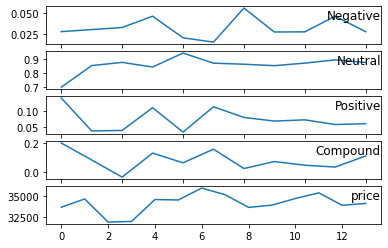

In [23]:
values = btc_twt.values
# specify columns to plot
groups = [0, 1,2,3,7]
i = 1
# plot each column
plt.figure()
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group])
    plt.title(btc_twt.columns[group], y=0.5, loc='right')
    i += 1
plt.show()

<AxesSubplot:xlabel='Compound'>

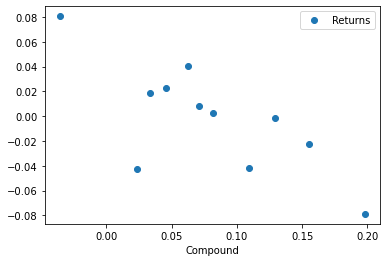

In [24]:
btc_twt.plot(x="Compound", y="Returns", style="o") 

In [25]:
btc_twt['Returns'].corr(btc_twt['Compound'])

-0.7482237605841165